[View in Colaboratory](https://colab.research.google.com/github/MicroprocessorX069/Edge-Detection-/blob/master/Edge_Detection.ipynb)

# Defined functions

**Steps of Edge detection:**
1. Calculate the dimensions of the image and the kernel
2. Flip the kernel i.e. First flip the kernel row wise and then column wise.
3. Pad the image with the size of kernel as zeros on both top and sides. The reason the image is padded, so that the kernel can convoluted even over edge and corner pixels of the image
4. Convolute the flipped kernel over the padded image.

**Convolution**:
Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel.
C(i, j)= E E A(m,n)∗B(i−m, j−n)

Where A is the kernel, B is the padded image and C is the convoluted resultant image.
m and n must be in limits of kernel size. While i and j must be in limits of input image's size.

In [0]:
import numpy as np
import cv2

#Convoltion function . 
#The functions convolutes the kernel over the image

def convolution11(input_image, kernel):
  input_image=np.array(input_image)
  
  # Padding the input image with half of the kernel length on both the sides of both the axes.
  padded_input=pad_image(input_image,int((len(kernel)-1)/2),int((len(kernel[0])-1)/2))
  padded_input=np.array(padded_input)
  
  #Flipping the kernel
  kernel=flip(kernel)
  sum_kernel=np.sum(kernel)
  
  #initializing result image
  new_image=np.zeros((len(input_image),len(input_image[0])))
  
  # Running the flipped kernel over the padded Image
  for input_x in range(len(input_image)):
    for input_y in range(len(input_image[0])):
        new_image[input_x,input_y]=0
        sum_img=0
        for kernel_x in range(len(kernel)):
           for kernel_y in range(len(kernel[0])):
              new_image[input_x,input_y]=int(new_image[input_x,input_y]) + int(padded_input[input_x+kernel_x, input_y+kernel_y])*int(kernel[kernel_x,kernel_y])
              sum_img=sum_img+padded_input[input_x+kernel_x, input_y+kernel_y]
        
 
  return(new_image)

def flip(matrix):
  new_matrix=np.zeros((matrix.shape))
  matrix=np.array(matrix)
  l=len(matrix)
  for i in range(l):
    for j in range(l):
      new_matrix[i,j]=matrix[l-i-1,l-j-1]
  return(new_matrix)

def negative(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         input_image[x,y]=255-input_image[x,y]
  return(input_image)

def pad_image(image,pad_x,pad_y):
  image_x=len(image[0])
  image_y=len(image)
  padded_image=np.zeros((image_y+pad_y*2,image_x+pad_x*2))
  padded_image_x=len(padded_image[0])
  padded_image_y=len(padded_image)
  
  for i in range(pad_y,image_y+pad_y):
    for j in range(pad_x, image_x+pad_x):
      padded_image[i,j]=image[i-pad_y,j-pad_x]
  return(padded_image)

# Main()


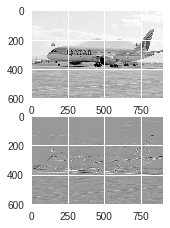

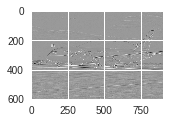

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

horizontal_sobel=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
vertical_sobel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
input_image=cv2.imread("task1.png",cv2.IMREAD_GRAYSCALE) #make sure the path to the image is in String format
input_image=negative(input_image)
input_image=np.array(input_image)
#plt.subplot(1,3)
#plt.imshow(input_image)
vertical_edged=convolution11(input_image,horizontal_sobel)
horizontal_edged=convolution11(input_image,horizontal_sobel) 
plt.figure(1)
plt.subplot(311)
plt.imshow(input_image)

plt.subplot(312)
plt.imshow(vertical_edged)
plt.show()


plt.subplot(312)
plt.imshow(horizontal_edged)
plt.show()
